In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/CoralDataset/train'
test_dir = '/content/drive/MyDrive/CoralDataset/test'

In [ ]:
import os

print(len(os.listdir('/content/drive/MyDrive/CoralDataset/train/Healthy')))
print(len(os.listdir('/content/drive/MyDrive/CoralDataset/train/Bleached')))
print(len(os.listdir('/content/drive/MyDrive/CoralDataset/test/Healthy')))
print(len(os.listdir('/content/drive/MyDrive/CoralDataset/test/Bleached')))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CoralDataset/train/Healthy'

In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'   CoralDataset  'Industry visit.xlsx'


In [ ]:
!ls /content/drive/MyDrive/CoralDataset

archive.zip  extracted


In [ ]:
!ls /content/drive/MyDrive/CoralDataset/extracted

'Bleached Corals and Healthy Corals Classification'


In [ ]:
!ls "/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification"

'Screenshot 2023-06-03 150340.png'   Testing   Training   Validation


In [ ]:
train_dir ='/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Training'
test_dir ='/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Testing'

In [ ]:
import os

print("Training Healthy:", len(os.listdir(train_dir + '/Healthy')))
print("Training Bleached:", len(os.listdir(train_dir + '/Bleached')))

print("Testing Healthy:", len(os.listdir(test_dir + '/Healthy')))
print("Testing Bleached:", len(os.listdir(test_dir + '/Bleached')))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Training/Healthy'

In [ ]:
print ("Hello")

Hello


In [ ]:
!ls /content/drive/MyDrive/CoralDataset/extracted





ls: cannot access '/content/drive/MyDrive/CoralDataset/extracted': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'   CoralDataset  'Industry visit.xlsx'


In [ ]:
!ls /content/drive/MyDrive/CoralDataset

archive.zip  extracted


In [ ]:
!ls /content/drive/MyDrive/CoralDataset/extracted

'Bleached Corals and Healthy Corals Classification'


In [ ]:
train_dir ="/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Training"

test_dir ="/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Testing"

In [ ]:
import os

print("Training Healthy:", len(os.listdir(train_dir + "/healthy_corals")))
print("Training Bleached:", len(os.listdir(train_dir + "/bleached_corals")))

print("Testing Healthy:", len(os.listdir(test_dir + "/healthy_corals")))
print("Testing Bleached:", len(os.listdir(test_dir + "/bleached_corals")))

Training Healthy: 3504
Training Bleached: 3880
Testing Healthy: 438
Testing Bleached: 485


In [ ]:
!ls "/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Training"

bleached_corals  healthy_corals


In [ ]:
!ls "/content/drive/MyDrive/CoralDataset/extracted/Bleached Corals and Healthy Corals Classification/Testing"

bleached_corals  healthy_corals


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 7384 images belonging to 2 classes.
Found 923 images belonging to 2 classes.


In [ ]:
import os
import shutil
import random

src_train = train_dir
src_test = test_dir

dst_train = "/content/drive/MyDrive/CoralDataset/small_train"
dst_test = "/content/drive/MyDrive/CoralDataset/small_test"

for f in ['healthy_corals', 'bleached_corals']:
  os.makedirs(os.path.join(dst_train, f), exist_ok=True)
  os.makedirs(os.path.join(dst_test, f), exist_ok=True)

  for fo in ['healthy_corals', 'bleached_corals']:
    files = os.listdir(os.path.join(src_train, f))
    selected = random.sample(files, 500)
    for file in selected:
      shutil.copy(os.path.join(src_train, f, file), os.path.join(dst_train,  f , file))


for f in ['healthy_corals', 'bleached_corals']:
  files = os.listdir(os.path.join(src_test, f))
  selected = random.sample(files, 50)
  for file in selected:
    shutil.copy(os.path.join(src_test, f, file), os.path.join(dst_test, f, file))

In [ ]:
import os

print("Training Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/healthy_corals")))
print("Training Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/bleached_corals")))

print("Testing Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/healthy_corals")))
print("Testing Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/bleached_corals")))

Training Healthy: 2104
Training Bleached: 1639
Testing Healthy: 95
Testing Bleached: 96


In [ ]:
import os

shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_train", ignore_errors=True)
shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_test", ignore_errors=True)

In [ ]:
import os
import shutil
import random

src_train = train_dir
src_test = test_dir

dst_train = "/content/drive/MyDrive/CoralDataset/small_train"
dst_test = "/content/drive/MyDrive/CoralDataset/small_test"

for f in ['healthy_corals', 'bleached_corals']:
  os.makedirs(os.path.join(dst_train, f), exist_ok=True)
  os.makedirs(os.path.join(dst_test, f), exist_ok=True)

  for fo in ['healthy_corals', 'bleached_corals']:
    files = os.listdir(os.path.join(src_train, f))
    selected = random.sample(files, 500)
    for file in selected:
      shutil.copy(os.path.join(src_train, f, file), os.path.join(dst_train,  f , file))


for f in ['healthy_corals', 'bleached_corals']:
  files = os.listdir(os.path.join(src_test, f))
  selected = random.sample(files, 50)
  for file in selected:
    shutil.copy(os.path.join(src_test, f, file), os.path.join(dst_test, f, file))

In [ ]:
print("Training Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/healthy_corals")))
print("Training Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/bleached_corals")))

print("Testing Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/healthy_corals")))
print("Testing Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/bleached_corals")))

Training Healthy: 917
Training Bleached: 933
Testing Healthy: 50
Testing Bleached: 50


In [ ]:
import shutil


shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_train", ignore_errors=True)
shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_test", ignore_errors=True)

In [ ]:
import os
import shutil
import random


src_train = train_dir
src_test = test_dir


dst_train = "/content/drive/MyDrive/CoralDataset/small_train"
dst_test  = "/content/drive/MyDrive/CoralDataset/small_test"


for f in ['healthy_corals', 'bleached_corals']:
    os.makedirs(os.path.join(dst_train, f), exist_ok=True)
    os.makedirs(os.path.join(dst_test, f), exist_ok=True)


for f in ['healthy_corals', 'bleached_corals']:
    files = os.listdir(os.path.join(src_train, f))
    selected = random.sample(files, 500)
    for file in selected:
        shutil.copy(os.path.join(src_train, f, file), os.path.join(dst_train, f, file))


for f in ['healthy_corals', 'bleached_corals']:
    files = os.listdir(os.path.join(src_test, f))
    selected = random.sample(files, 50)
    for file in selected:
        shutil.copy(os.path.join(src_test, f, file), os.path.join(dst_test, f, file))

In [ ]:
print("Training Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/healthy_corals")))
print("Training Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/bleached_corals")))

print("Testing Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/healthy_corals")))
print("Testing Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/bleached_corals")))

Training Healthy: 928
Training Bleached: 924
Testing Healthy: 93
Testing Bleached: 93


In [ ]:
import shutil

shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_train", ignore_errors=True)
shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_test", ignore_errors=True)

print("small_train & small_test")

small_train & small_test


In [ ]:
import shutil

shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_train", ignore_errors=True)
shutil.rmtree("/content/drive/MyDrive/CoralDataset/small_test", ignore_errors=True)


In [ ]:
import os
import shutil
import random


src_train = train_dir
src_test = test_dir


dst_train = "/content/drive/MyDrive/CoralDataset/small_train"
dst_test  = "/content/drive/MyDrive/CoralDataset/small_test"


for f in ['healthy_corals', 'bleached_corals']:
    os.makedirs(os.path.join(dst_train, f), exist_ok=True)
    os.makedirs(os.path.join(dst_test, f), exist_ok=True)


for f in ['healthy_corals', 'bleached_corals']:
    files = os.listdir(os.path.join(src_train, f))
    selected = random.sample(files, 500)
    for file in selected:
        shutil.copy(os.path.join(src_train, f, file), os.path.join(dst_train, f, file))


for f in ['healthy_corals', 'bleached_corals']:
    files = os.listdir(os.path.join(src_test, f))
    selected = random.sample(files, 50)
    for file in selected:
        shutil.copy(os.path.join(src_test, f, file), os.path.join(dst_test, f, file))

In [ ]:
print("Training Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/healthy_corals")))
print("Training Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_train/bleached_corals")))

print("Testing Healthy:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/healthy_corals")))
print("Testing Bleached:", len(os.listdir("/content/drive/MyDrive/CoralDataset/small_test/bleached_corals")))

Training Healthy: 500
Training Bleached: 500
Testing Healthy: 50
Testing Bleached: 50


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/CoralDataset/small_train",
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/CoralDataset/small_test",
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(256,256,3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 159s 5s/step - accuracy: 0.6840 - loss: 0.6102 - val_accuracy: 0.6400 - val_loss: 0.5572
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 157s 5s/step - accuracy: 0.7032 - loss: 0.5867 - val_accuracy: 0.7100 - val_loss: 0.5672
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.7006 - loss: 0.5814 - val_accuracy: 0.7000 - val_loss: 0.5570
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.7119 - loss: 0.5941 - val_accuracy: 0.6700 - val_loss: 0.5962
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.7280 - loss: 0.5609 - val_accuracy: 0.7100 - val_loss: 0.5488
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.7116 - loss: 0.5769 - val_accuracy: 0.6700 - val_loss: 0.5386
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.7280 - loss: 0.5360 - val_accuracy: 0.6800 - val_loss: 0.5398
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.7037 - loss: 0.5790 - val_accuracy: 0.7100 - v

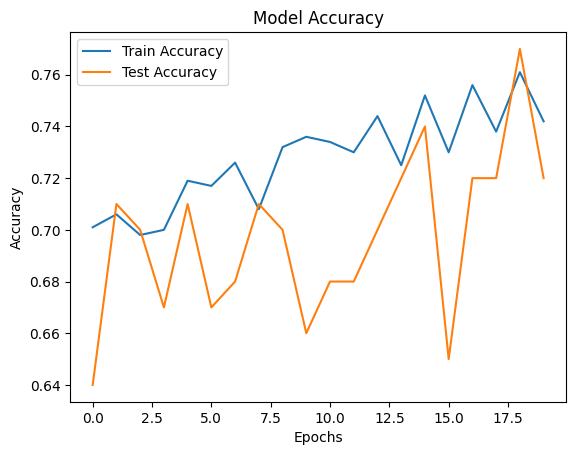

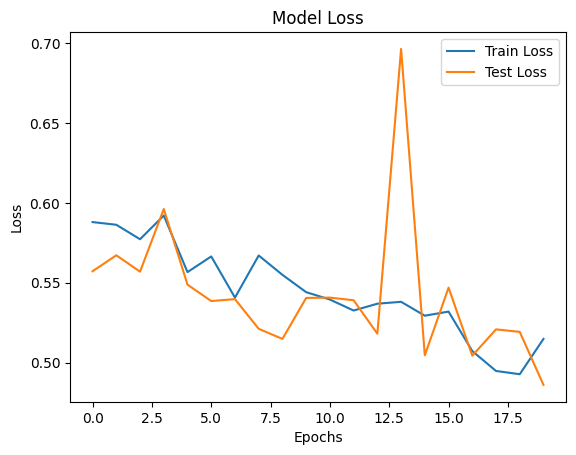

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/CoralDataset/small_test",
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 100 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int)

In [ ]:
true_labels = test_generator.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[36 14]
 [14 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        50
           1       0.72      0.72      0.72        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Source folders (full dataset)
src_train = "/content/drive/MyDrive/CoralDataset/Training"
src_test  = "/content/drive/MyDrive/CoralDataset/Testing"

# Destination folders (small dataset)
dst_train = "/content/drive/MyDrive/CoralDataset/small_train"
dst_test  = "/content/drive/MyDrive/CoralDataset/small_test"